#### Q6 Presidential logorrhea 

In [1]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import re
sns.set_style("whitegrid")
from nltk import sent_tokenize, word_tokenize

In [2]:
with open('speeches.json', 'r') as f:
    speeches = json.loads(f.read())

In [3]:
year = {}
for add in speeches:
    if add['year'] not in year:
        year[add['year']] = {} 
        year[add['year']]['sen'] = 0
        year[add['year']]['word'] = 0
    # number of sentenses 
    add['text'] = re.sub(r'\r\n\r\n', ' ', add['text'])
    l = re.split("(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\:)\s", 
                 add['text'])
    year[add['year']]['sen'] += len(l) 
    # total sentences length 
    for sen in l:
        year[add['year']]['word'] += len(
            re.split(r'[a-zA-Z0-9]+', sen))

In [4]:
df = pd.DataFrame.from_dict(year, orient='index')
df['len'] = df['word']/df['sen']
df['year'] = df.index.astype('int32')
df.head()

,sen,word,len,year
1790,43,1449,33.697674,1790
1791,63,2374,37.682540,1791
1792,64,2168,33.875000,1792
1793,58,2031,35.017241,1793
1794,83,3005,36.204819,1794


In [5]:
X = np.column_stack(([1]*223, df.year))
sen = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(df.sen)
word = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(df.len)
print('Number of Sentences: ', sen)
print('Mean Sentence length: ', word)
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X, y)
# reg.coef_

Number of Sentences:  [-1.44560254e+03  9.12515632e-01]
Mean Sentence length:  [ 2.54380161e+02 -1.17550907e-01]


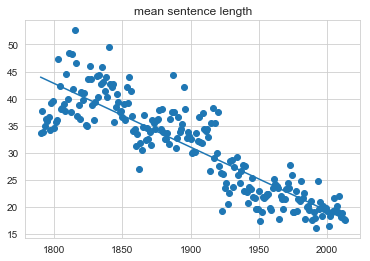

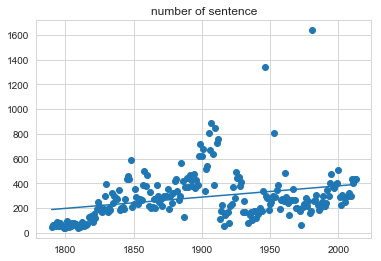

In [6]:
# plot data 
import matplotlib.pyplot as plt
df['year'] = df['year'].astype('int')
plt.scatter(df['year'], df['len'])
plt.title(r'mean sentence length')
plt.plot(df['year'], word[0] + word[1] * df['year'].astype(
    'float'), '-')
plt.show()
plt.scatter(df['year'], df['sen'])
plt.title(r'number of sentence')
plt.plot(df['year'], sen[0] + sen[1] * df['year'].astype(
    'float'), '-')
plt.show()

The number of sentence increases with year but the mean sentence length decreases. The trend might be driven by the fact that modern English is simpler than English in the past. Short and simple sentences can be more expressive.

In [7]:
# experiment with nltk parsing and words 
# with underscore and dollar sign
year1 = {} 
for add in speeches:
    if add['year'] not in year1:
        year1[add['year']] = {} 
        year1[add['year']]['sen'] = 0
        year1[add['year']]['word'] = 0
    # number of sentenses 
    add['text'] = re.sub(r'\r\n\r\n', ' ', add['text'])
    l = sent_tokenize(add['text'])
    year1[add['year']]['sen'] += len(l) 
    # total sentences length 
    for sen in l:
        year1[add['year']]['word'] += len(
            re.split(r'[\w$]+', sen))

df1 = pd.DataFrame.from_dict(year1, orient='index')
df1['len'] = df1['word']/df1['sen']
df1['year'] = df1.index.astype('int32')

X1 = np.column_stack(([1]*223, df1.year))
sen1 = np.linalg.inv(np.dot(X1.T, X1)).dot(X1.T).dot(df1.sen)
word1 = np.linalg.inv(np.dot(X1.T, X1)).dot(X1.T).dot(df1.len)
print('Number of Sentences: ', sen1)
print('Mean Sentence length: ', word1)

Number of Sentences:  [-1.33815438e+03  8.53084595e-01]
Mean Sentence length:  [ 2.55047821e+02 -1.17613996e-01]


In general, the trends using nltk parsing rules and include those words with underscores and dollar sign does not change the trend significantly.

In [8]:
## c). trends 
dta = pd.DataFrame(speeches)
dta['year'] = dta['year'].astype('int')
sen, word = [], []
for i, row in dta.iterrows():
    # sentence 
    row['text'] = re.sub(r'\r\n\r\n', ' ', row['text'])
    l = re.split("(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\:)\s", 
                 row['text'])
    sen.append(len(l))
    # words 
    leng = 0
    for s in l:
        leng += len(re.findall(r"[\w]+", s))
    word.append(leng)
   
dta['sen'], dta['word'] = sen, word
dta['len'] = dta['word']/dta['sen']

In [9]:
dta.head(10)

,president,text,year,sen,word,len
0,George Washington,Fellow-Citizens of the Senate and House of Re...,1790,43,1406,32.697674
1,George Washington,Fellow-Citizens of the Senate and House of Re...,1791,63,2311,36.682540
2,George Washington,Fellow-Citizens of the Senate and House of Rep...,1792,64,2104,32.875000
3,George Washington,Fellow-Citizens of the Senate and House of Re...,1793,58,1973,34.017241
4,George Washington,Fellow-Citizens of the Senate and House of Re...,1794,83,2922,35.204819
5,George Washington,Fellow-Citizens of the Senate and House of Rep...,1795,57,1988,34.877193
6,George Washington,Fellow-Citizens of the Senate and House of Re...,1796,81,2881,35.567901
7,John Adams,Gentlemen of the Senate and Gentlemen of the ...,1797,62,2062,33.258065
8,John Adams,Gentlemen of the Senate and Gentlemen of the ...,1798,58,2220,38.275862
9,John Adams,Gentlemen of the Senate and Gentlemen of the ...,1799,39,1507,38.641026


In [10]:
dta12 = dta[dta['year'] <= 1912]
l = [i for i in dta['year'].unique() if i > 1912]
X_12 = np.column_stack(([1]*123, range(1790, 1913)))
dta13 = dta[dta['year'] > 1912]
X_13 = np.column_stack(([1]*100, l))

In [11]:
dta.head()

,president,text,year,sen,word,len
0,George Washington,Fellow-Citizens of the Senate and House of Re...,1790,43,1406,32.697674
1,George Washington,Fellow-Citizens of the Senate and House of Re...,1791,63,2311,36.682540
2,George Washington,Fellow-Citizens of the Senate and House of Rep...,1792,64,2104,32.875000
3,George Washington,Fellow-Citizens of the Senate and House of Re...,1793,58,1973,34.017241
4,George Washington,Fellow-Citizens of the Senate and House of Re...,1794,83,2922,35.204819


In [12]:
total_12 = dta12.groupby(dta12['year'])['word'].agg('sum')
total_13 = dta13.groupby(dta13['year'])['word'].agg('sum')

In [13]:
print('1790-1912: ', 
      np.linalg.inv(np.dot(X_12.T, X_12)).dot(X_12.T).dot(total_12))
print('1913 to the present: ', 
      np.linalg.inv(np.dot(X_13.T, X_13)).dot(X_13.T).dot(total_13))

1790-1912:  [-2.52849131e+05  1.42030659e+02]
1913 to the present:  [-6078.8836463     6.2267833]


Explanation for the change: 
In 1913, SOU starts the regular practice of delivering the address to Congress in person as a way to rally support for the President's agenda. Hence, the total number of words increased significantly since then. 

In [14]:
dta['avg'] = dta.groupby('president')['len'].transform('mean')

In [15]:
dta.head()

,president,text,year,sen,word,len,avg
0,George Washington,Fellow-Citizens of the Senate and House of Re...,1790,43,1406,32.697674,34.560338
1,George Washington,Fellow-Citizens of the Senate and House of Re...,1791,63,2311,36.682540,34.560338
2,George Washington,Fellow-Citizens of the Senate and House of Rep...,1792,64,2104,32.875000,34.560338
3,George Washington,Fellow-Citizens of the Senate and House of Re...,1793,58,1973,34.017241,34.560338
4,George Washington,Fellow-Citizens of the Senate and House of Re...,1794,83,2922,35.204819,34.560338


### d)

In [16]:
dta.sort_values(by=['avg'], ascending=False).head(1)

,president,text,year,sen,word,len,avg
22,James Madison,Fellow-Citizens of the Senate and House of Re...,1812,89,3251,36.52809,43.945435


James Madison has the longest sentence on average.

In [17]:
dta.sort_values(by=['avg'], ascending=True).head(1)

,president,text,year,sen,word,len,avg
204,George Bush,"Mr. Speaker and Mr. President, distinguished M...",1992,345,5223,15.13913,16.639561


George Bush has the shortest sentence on average.

In [18]:
presid = {}
longest = 0
shortest = np.inf
for p in dta['president'].unique():
    presid[p] = []
    for i, row in dta[dta['president'] == p].iterrows():
        l = sent_tokenize(row['text'])
        for j in l:
            ws = re.findall(r"[\w$]+", j)
            presid[p].append(len(ws))
            if len(ws) > longest:
                long_sen = j
                long_p = row['president']
                long_y = row['year']
                longest =  len(ws)
            if len(ws) < shortest:
                if j != '.':
                    short_sen = j
                    short_p = row['president']
                    short_y = row['year']
                    shortest = len(ws)

In [19]:
pre, p25, p50, p75 = [], [], [], []
for p, v in presid.items():
    pre.append(p)
    p25.append(np.percentile(np.array(v), 25))
    p50.append(np.percentile(np.array(v), 50))
    p75.append(np.percentile(np.array(v), 75))
pd.DataFrame({'president': pre, 'p25': p25, 'p50': p50, 'p75': p75})

,president,p25,p50,p75
0,George Washington,22.00,33.0,49.0
1,John Adams,20.00,33.0,46.0
2,Thomas Jefferson,22.00,34.0,51.0
3,James Madison,26.25,39.5,56.0
4,James Monroe,22.00,32.0,46.0
5,John Quincy Adams,24.00,37.0,53.5
6,Andrew Jackson,25.00,37.0,52.0
7,Martin Van Buren,24.00,37.0,54.0
8,John Tyler,23.00,36.0,51.0
9,James K. Polk,23.00,33.0,48.0


In [20]:
# the longest sentence ever said
print(longest)
print(long_p)
print(long_y)
print(long_sen)

856
Chester A. Arthur
1883
It shows that the ordinary revenues from all sources for the fiscal year ended June 30, 1883, amounted to $398,287,581.95, whereof there was received--          From customs    $214,706,496.93        From internal revenue    144,720,368.98        From sales of public lands    7,955,864.42        From tax on circulation and deposits of national banks    9,111,008.85        From profits on coinage, bullion deposits, and assays    4,460,205.17        From other sources    17,333,637.60          Total        398,287,581.95             For the same period the ordinary expenditures were:          For civil expenses    $22,343,285.76        For foreign intercourse    2,419,275.24        For Indians    7,362,590.34        For Pensions    66,012,573.64        For the military establishment, including river and harbor  improvements and arsenals    48,911,382.93        For the naval establishment, including vessels, machinery,  and improvements at navy-yards    15,283,4

In [21]:
# the shortest word ever said is by 'George Washington' in 1790: 'Go'
print(short_p)
print(short_y)
print(short_sen)
print(shortest)

George Washington
1790
GO.
1
